Compute distances between 10 songs



*   compute distances between the 10 songs, using the audio features.
*   Scale the data and observe how the differences change (or not).
*   Experiment hwo the distances change if you keep/exclude certain audio feautres.
*   Try using very few audio features so you can observe real differences.






 





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# import the data df_audio_features_10.csv
songs = pd.read_csv('df_audio_features_10.csv')
songs.head()


,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...


In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         10 non-null     object 
 1   artist            10 non-null     object 
 2   danceability      10 non-null     float64
 3   energy            10 non-null     float64
 4   key               10 non-null     int64  
 5   loudness          10 non-null     float64
 6   mode              10 non-null     int64  
 7   speechiness       10 non-null     float64
 8   acousticness      10 non-null     float64
 9   instrumentalness  10 non-null     float64
 10  liveness          10 non-null     float64
 11  valence           10 non-null     float64
 12  tempo             10 non-null     float64
 13  duration_ms       10 non-null     int64  
 14  time_signature    10 non-null     int64  
 15  id                10 non-null     object 
 16  html              10 non-null     object 
dtype

preparing data for sklearn calucalations

In [40]:
# combine name and artist and id columns into a one column and drop html column
songs['name_artist_id'] = songs['song_name'] + ' - ' + songs['artist'] + ' -' + songs['id']
songs.sample(3)



,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,name_artist_id
5,Sultans Of Swing,Dire Straits,0.733,0.7940,5,-10.023,1,0.0307,0.0614,0.03670,0.330,0.931,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...,Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.0451,3,-24.698,1,0.0364,0.9900,0.91300,0.112,0.071,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...,Nocturne en mi bémol majeur opus 9 n°2: Ballad...
3,The Girl From Ipanema,Stan Getz,0.641,0.1400,8,-16.790,1,0.0390,0.8670,0.00166,0.105,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...,The Girl From Ipanema - Stan Getz -3898C4Abdbp...


In [33]:
#alternative ways to combine columns

# CONFIRMED WORKING methods
# with apply method and f string
songs['name_artist_id'] = songs.apply(lambda x: f"{x['song_name']} - {x['artist']} - {x['id']}", axis=1)

#with the str.cat() method
songs['name_artist_id'] = songs['song_name'].str.cat(songs['artist'], sep=' - ').str.cat(songs['id'], sep=' - ')
#or
songs['name_artist_id'] = songs['song_name'].str.cat([songs['artist'], songs['id']], sep=' - ')


#PRODUCE ERRORS OR INCORRECT OUTPUTS
# with join method. Error TypeError: sequence item 0: expected str instance, numpy.ndarray found
# songs['name_artist_id'] = ' - '.join(songs[['song_name', 'artist', 'id']].astype(str).values)

# with f string. Seems not correct because it shows the same value for all rows 0...
# songs['name_artist_id'] = f"{songs['song_name']} - {songs['artist']} - {songs['id']}"



songs.sample(3)


,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,name_artist_id
3,The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.867,0.001660,0.105,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...,The Girl From Ipanema - Stan Getz - 3898C4Abdb...
0,My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.497,0.000002,0.116,0.844,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...,My Band - D12 - 4XHQyvbrBsQaaBUW1VvmsL
2,Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.854,0.000000,0.105,0.491,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...,Águas De Março - Antônio Carlos Jobim - 1y7OxO...


In [42]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'song_name', 'artist', 'id'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'song_name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist_id
6,0.749,0.731,4,-10.865,1,0.1080,0.00314,0.86700,0.111,0.0598,131.997,438720,4,Space Raiders - Charlotte de Witte Remix - Eat...
7,0.736,0.845,1,-12.017,1,0.0377,0.00548,0.90100,0.111,0.1980,128.009,393740,4,In Silence - Amelie Lens -2vfSCFvMbpf4hwxt22Wx7b
4,0.464,0.795,1,-9.267,1,0.0926,0.04930,0.00244,0.399,0.6120,158.691,202267,4,"Paint It, Black - The Rolling Stones -63T7DJ1A..."


In [43]:
#set the index to name_artist_id
filtered_songs.set_index('name_artist_id', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist_id,,,,,,,,,,,,,
Águas De Março - Antônio Carlos Jobim -1y7OxO5i6sfrHXAmUM77YG,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.105,0.491,143.418,212400,4
Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ80OjWqEBQ,0.733,0.794,5,-10.023,1,0.0307,0.0614,0.036700,0.330,0.931,148.174,348624,4
My Band - D12 -4XHQyvbrBsQaaBUW1VvmsL,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.116,0.844,120.014,298773,4


sklearn

In [47]:
#import sklearn
from sklearn.metrics import pairwise_distances

#euclidean distance
eucl = pd.DataFrame(pairwise_distances(filtered_songs), columns=filtered_songs.index, index=filtered_songs.index)
eucl

name_artist_id,My Band - D12 -4XHQyvbrBsQaaBUW1VvmsL,The Real Slim Shady - Eminem -3yfqSUWxFvZELEM4PmlwIR,Águas De Março - Antônio Carlos Jobim -1y7OxO5i6sfrHXAmUM77YG,The Girl From Ipanema - Stan Getz -3898C4AbdbptwYet6547e5,"Paint It, Black - The Rolling Stones -63T7DJ1AFDD6Bn8VzG6JE8",Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ80OjWqEBQ,Space Raiders - Charlotte de Witte Remix - Eats Everything -4F8OK7mNa51mKqgHqWQiYm,In Silence - Amelie Lens -2vfSCFvMbpf4hwxt22Wx7b,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms -59cPOVxrn3Yjwydl1pullI",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin -7n92QzQomRCLlciO14X0kd
name_artist_id,,,,,,,,,,
My Band - D12 -4XHQyvbrBsQaaBUW1VvmsL,0.000000,14573.008837,86373.004053,19214.008255,96506.007937,49851.008569,139947.000755,94967.000742,188973.011468,30346.064036
The Real Slim Shady - Eminem -3yfqSUWxFvZELEM4PmlwIR,14573.008837,0.000000,71800.011470,33787.011607,81933.018179,64424.015069,154520.002598,109540.002881,174400.007771,15773.072153
Águas De Março - Antônio Carlos Jobim -1y7OxO5i6sfrHXAmUM77YG,86373.004053,71800.011470,0.000000,105587.001068,10133.013675,136224.000212,226320.000342,181340.000704,102600.034257,56027.060661
The Girl From Ipanema - Stan Getz -3898C4AbdbptwYet6547e5,19214.008255,33787.011607,105587.001068,0.000000,115720.004190,30637.006720,120733.000250,75753.000499,208187.011767,49560.047303
"Paint It, Black - The Rolling Stones -63T7DJ1AFDD6Bn8VzG6JE8",96506.007937,81933.018179,10133.013675,115720.004190,0.000000,146357.000435,236453.001534,191473.002481,92467.054250,66160.073247
Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ80OjWqEBQ,49851.008569,64424.015069,136224.000212,30637.006720,146357.000435,0.000000,90096.001470,45116.004743,238824.016883,80197.048230
Space Raiders - Charlotte de Witte Remix - Eats Everything -4F8OK7mNa51mKqgHqWQiYm,139947.000755,154520.002598,226320.000342,120733.000250,236453.001534,90096.001470,0.000000,44980.000292,328920.008331,170293.015164
In Silence - Amelie Lens -2vfSCFvMbpf4hwxt22Wx7b,94967.000742,109540.002881,181340.000704,75753.000499,191473.002481,45116.004743,44980.000292,0.000000,283940.008605,125313.018317
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms -59cPOVxrn3Yjwydl1pullI",188973.011468,174400.007771,102600.034257,208187.011767,92467.054250,238824.016883,328920.008331,283940.008605,0.000000,158627.000248


In [50]:
#import manhattan from sklearn
#this show the same result as euclidean distance. Check why

from sklearn.metrics.pairwise import manhattan_distances

#manhattan distance

manh = pd.DataFrame(manhattan_distances(filtered_songs), columns=filtered_songs.index, index=filtered_songs.index)
manh

name_artist_id,My Band - D12 -4XHQyvbrBsQaaBUW1VvmsL,The Real Slim Shady - Eminem -3yfqSUWxFvZELEM4PmlwIR,Águas De Março - Antônio Carlos Jobim -1y7OxO5i6sfrHXAmUM77YG,The Girl From Ipanema - Stan Getz -3898C4AbdbptwYet6547e5,"Paint It, Black - The Rolling Stones -63T7DJ1AFDD6Bn8VzG6JE8",Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ80OjWqEBQ,Space Raiders - Charlotte de Witte Remix - Eats Everything -4F8OK7mNa51mKqgHqWQiYm,In Silence - Amelie Lens -2vfSCFvMbpf4hwxt22Wx7b,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms -59cPOVxrn3Yjwydl1pullI",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1 - Frédéric Chopin -7n92QzQomRCLlciO14X0kd
name_artist_id,,,,,,,,,,
My Band - D12 -4XHQyvbrBsQaaBUW1VvmsL,0.000000,14594.304002,86413.021202,19246.512458,96552.976938,49891.798398,139972.860258,94986.836618,189068.864568,30432.332298
The Real Slim Shady - Eminem -3yfqSUWxFvZELEM4PmlwIR,14594.304002,0.000000,71855.037200,33830.477260,81998.387540,64475.348000,154558.094660,109578.247820,174479.807370,15843.291100
Águas De Março - Antônio Carlos Jobim -1y7OxO5i6sfrHXAmUM77YG,86413.021202,71855.037200,0.000000,105607.805660,10158.412540,136238.385600,226339.745060,181363.645820,102702.765770,56120.247500
The Girl From Ipanema - Stan Getz -3898C4AbdbptwYet6547e5,19246.512458,33830.477260,105607.805660,0.000000,115766.118080,30667.985940,120748.435400,75768.840160,208278.985910,49642.441840
"Paint It, Black - The Rolling Stones -63T7DJ1AFDD6Bn8VzG6JE8",96552.976938,81998.387540,10158.412540,115766.118080,0.000000,146373.039260,236486.407320,191508.453280,92594.722630,66278.190360
Sultans Of Swing - Dire Straits -6cr6UDpkjEaMQ80OjWqEBQ,49891.798398,64475.348000,136238.385600,30667.985940,146373.039260,0.000000,90116.154060,45144.092220,238940.901770,80304.338500
Space Raiders - Charlotte de Witte Remix - Eats Everything -4F8OK7mNa51mKqgHqWQiYm,139972.860258,154558.094660,226339.745060,120748.435400,236486.407320,90116.154060,0.000000,44988.511840,329017.852830,170380.500560
In Silence - Amelie Lens -2vfSCFvMbpf4hwxt22Wx7b,94986.836618,109578.247820,181363.645820,75768.840160,191508.453280,45144.092220,44988.511840,0.000000,284033.665390,125396.470720
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby] - Johannes Brahms -59cPOVxrn3Yjwydl1pullI",189068.864568,174479.807370,102702.765770,208278.985910,92594.722630,238940.901770,329017.852830,284033.665390,0.000000,158637.573270


<AxesSubplot:xlabel='name_artist_id', ylabel='name_artist_id'>

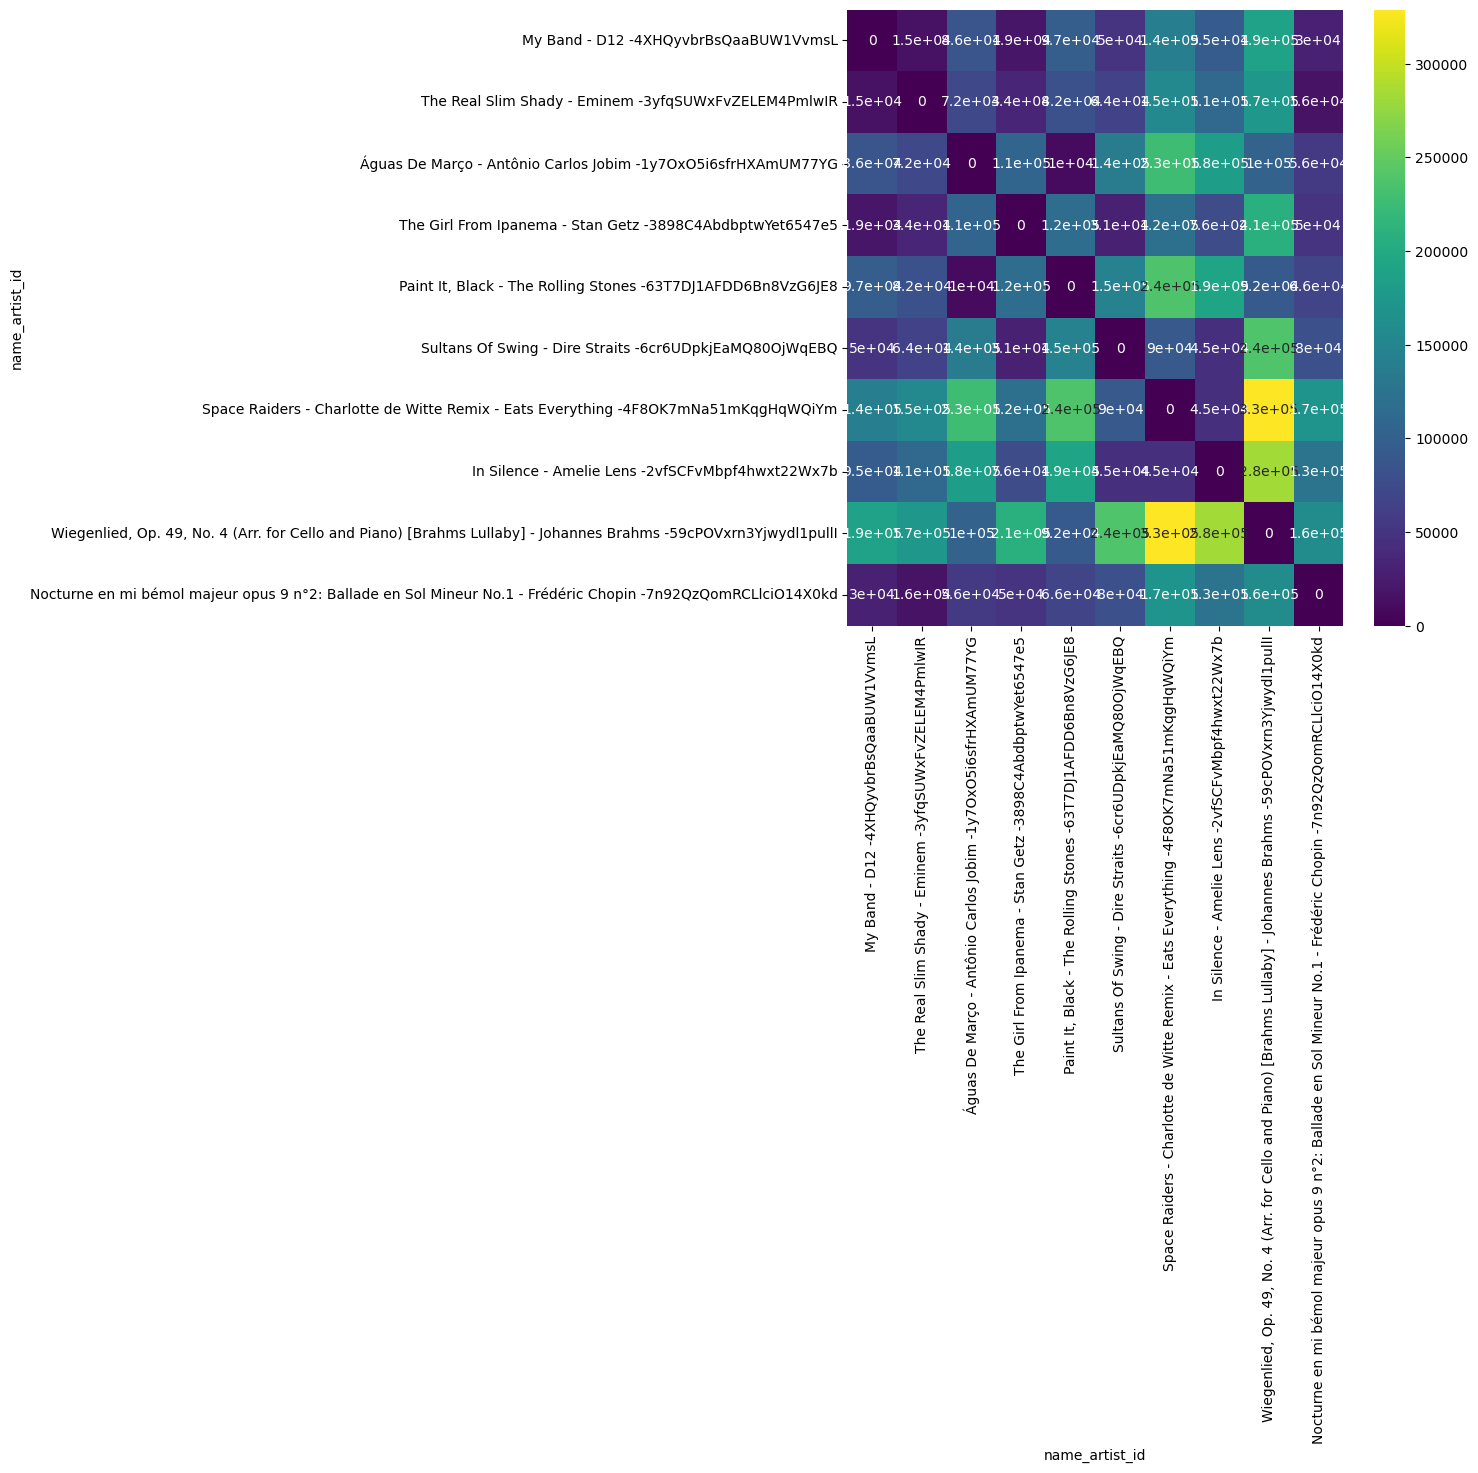

In [53]:
plt.subplots(figsize=(8,8))
sns.heatmap(eucl, cmap='viridis', annot=True)

In [54]:
#scale the data
from sklearn.preprocessing import StandardScaler

#normalize the data
songs_norm = StandardScaler().fit_transform(filtered_songs)

In [60]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(songs_norm)

#convert to dataframe
distances = pd.DataFrame(distances, columns=filtered_songs.index, index=filtered_songs.index)
# distances = pd.DataFrame(distances, columns=songs_norm.index, index=songs_norm.index)

<AxesSubplot:xlabel='name_artist_id', ylabel='name_artist_id'>

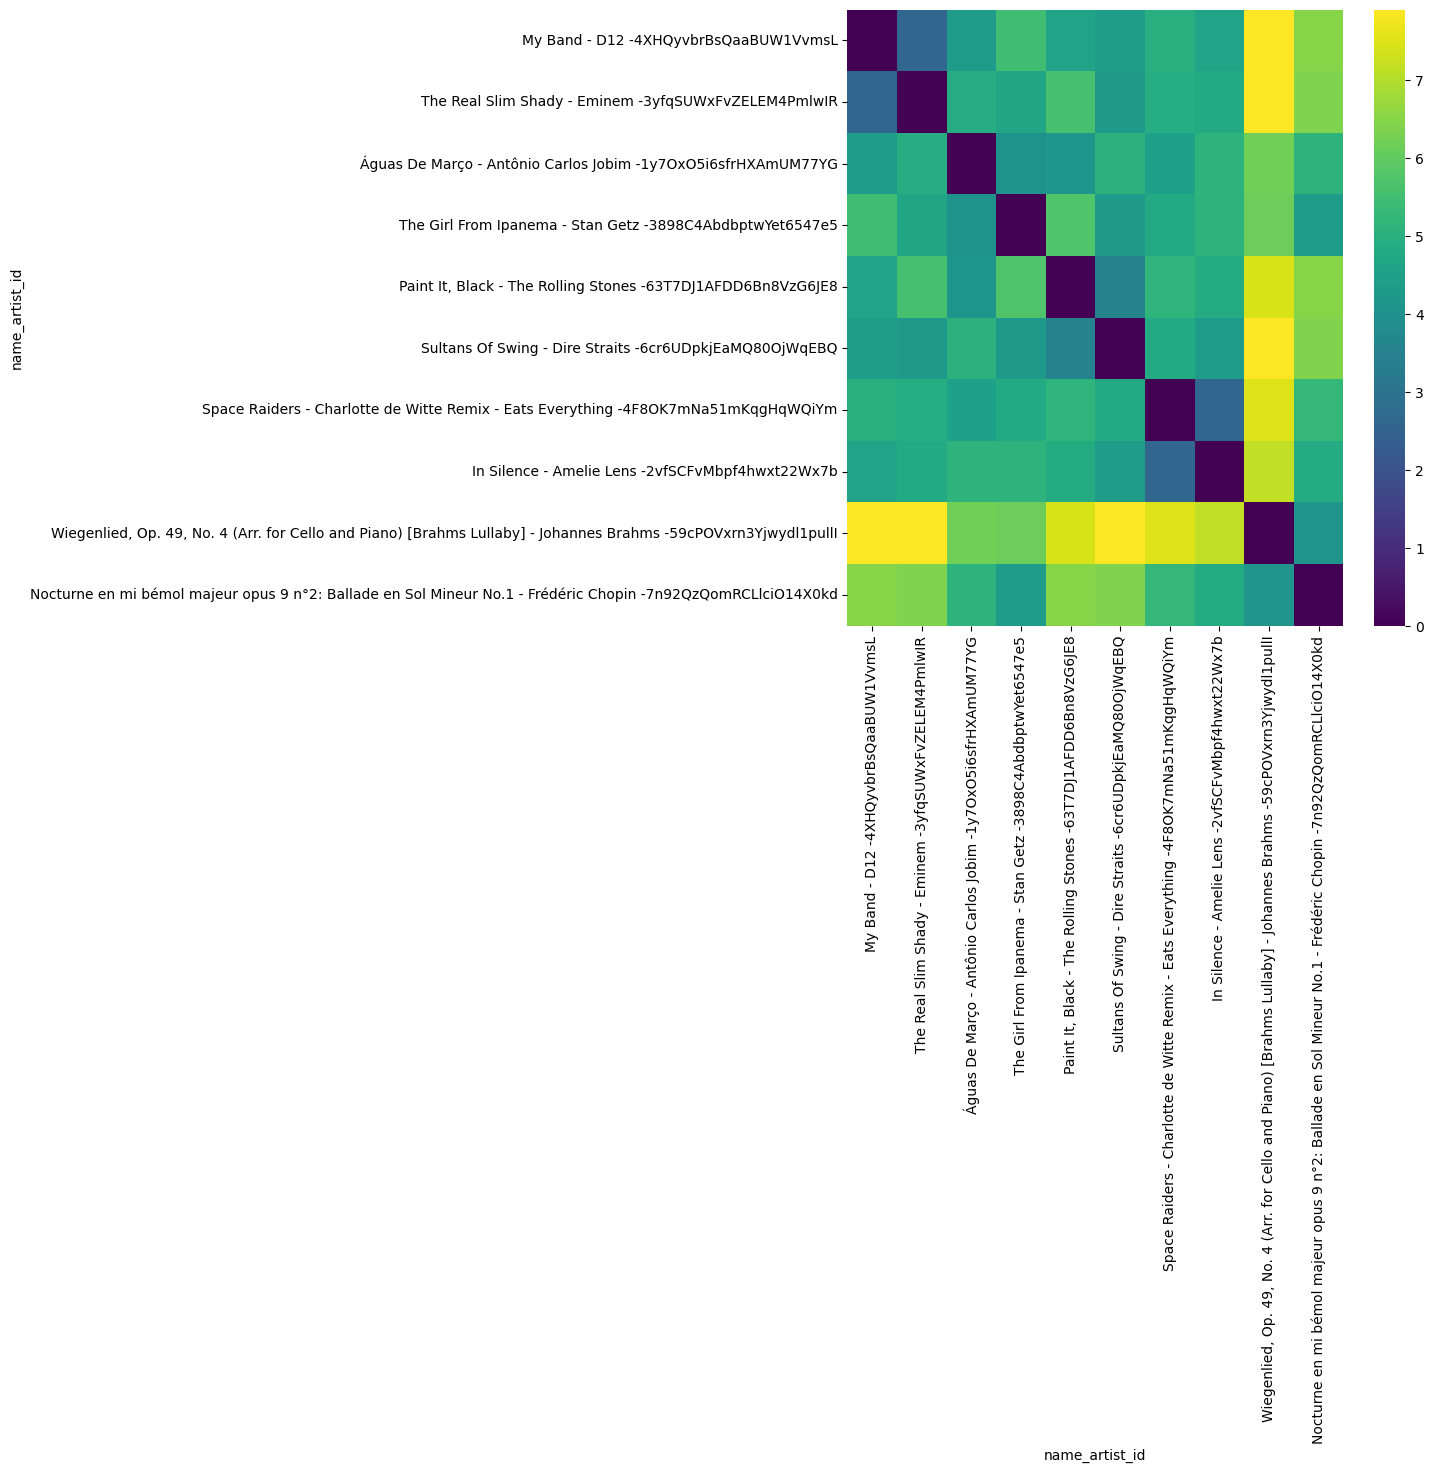

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(distances, cmap='viridis')
